In [1]:
# VARIABLE DESCRIPTIONS:
# 1  survival        Survival
#                    (0 = No; 1 = Yes)
# 2  pclass          Passenger Class
#                    (1 = 1st; 2 = 2nd; 3 = 3rd)
# 3  name            Name
# 4  sex             Sex
# 5  age             Age
# 6  sibsp           Number of Siblings/Spouses Aboard
# 7  parch           Number of Parents/Children Aboard
# 8  ticket          Ticket Number
# 9  fare            Passenger Fare
# 10 cabin           Cabin
# 11 embarked        Port of Embarkation
#                    (C = Cherbourg; Q = Queenstown; S = Southampton)

# SPECIAL NOTES:
# Pclass is a proxy for socio-economic status (SES)
#  1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower
# 
# Age is in Years; Fractional if Age less than One (1)
#  If the Age is Estimated, it is in the form xx.5
# 
# With respect to the family relation variables (i.e. sibsp and parch)
# some relations were ignored.  The following are the definitions used
# for sibsp and parch.
# 
# Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
# Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
# Parent:   Mother or Father of Passenger Aboard Titanic
# Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic
# 
# Other family relatives excluded from this study include cousins,
# nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
# only with a nanny, therefore parch=0 for them.  As well, some
# travelled with very close friends or neighbors in a village, however,
# the definitions do not support such relations.

In [2]:
%matplotlib inline

import numpy as np
import matplotlib as matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd

In [69]:
train_path='./train.csv'
test_path='./test.csv'

# import data
traindf = pd.read_csv(train_path)

In [4]:
# visualize some data
traindf.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# visualize data statistics
traindf.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# look for missing data
def num_missing(x):
  return sum(x.isnull())

# apply the function to each column
print("Missing values per column:")
print(traindf.apply(num_missing, axis=0))

Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
# Look at the empty Embarkment values
traindf[traindf.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [8]:
from scipy.stats import mode

# We fill empty values of Embarked with the mode for the corresponding class
mode_Embarked=[]

for x in [0, 1, 2]:
    mode_Embarked.append(mode(traindf.Embarked[np.logical_and(~traindf.Embarked.isnull(), traindf.Pclass==x+1)])[0][0])

print('Mode for the Embarked feature by class [1 2 3]:', mode_Embarked)

Mode for the Embarked feature by class [1 2 3]: ['S', 'S', 'S']


/Users/Gambero/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:257: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [9]:
# Look at the empty Age values
traindf[traindf.Age.isnull()][0:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


Mean Age by class
Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

Std Age by class
Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


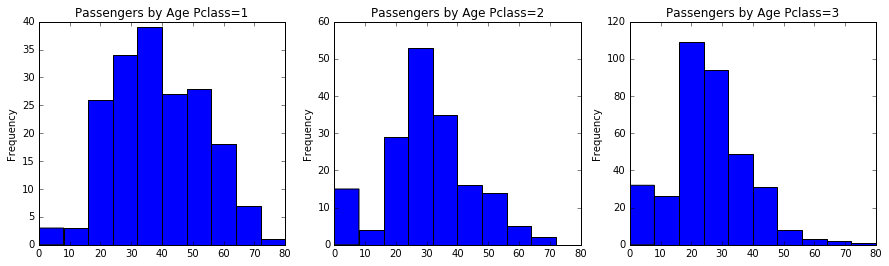

In [10]:
# Look at the Age distribution by Pclass

# compute averages and std
mean_Age = traindf.pivot_table('Age',index='Pclass', aggfunc='mean')
std_Age = traindf.pivot_table('Age',index='Pclass', aggfunc='mean')

print('Mean Age by class')
print(mean_Age)

print('\nStd Age by class')
print(mean_Age)

# Look at the age histograms by class
plt.figure(1, figsize=(15,4))

for x in range(0,3):
    plt.subplot(1,3,x+1)
    plt.title('Passengers by Age Pclass='+str(x+1))
    traindf.Age[traindf.Pclass==x+1].plot(kind='hist',range=(0,80))

In [11]:
# Look at the empty Fare values
traindf[traindf.Fare==0][0:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S


Mean Fare by class
Pclass
1    86.148874
2    21.358661
3    13.787875
Name: Fare, dtype: float64

Std Fare by class
Pclass
1    86.148874
2    21.358661
3    13.787875
Name: Fare, dtype: float64


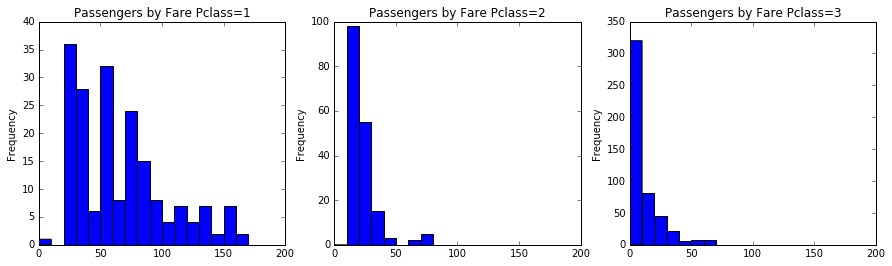

In [12]:
# Look at the Fare distribution by Pclass

# change zeros to NaN
traindf.Fare = traindf.Fare.map(lambda x: np.nan if x==0 else x)

# compute averages and std
mean_Fare = traindf.pivot_table('Fare',index='Pclass', aggfunc='mean')
std_Fare = traindf.pivot_table('Fare',index='Pclass', aggfunc='mean')

print('Mean Fare by class')
print(mean_Fare)

print('\nStd Fare by class')
print(mean_Fare)

# Look at the Fare histograms by Fclass
plt.figure(1, figsize=(15,4))

for x in range(0,3):
    plt.subplot(1,3,x+1)
    plt.title('Passengers by Fare Pclass='+str(x+1))
    traindf.Fare[traindf.Pclass==x+1].plot(kind='hist',range=(0,200),bins=20)

In [13]:
# Look at the empty Cabin values
traindf[traindf.Cabin.isnull()][0:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [14]:
from clean import clean_data

# Clean the training values
traindf=clean_data(traindf)

/Users/Gambero/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:257: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


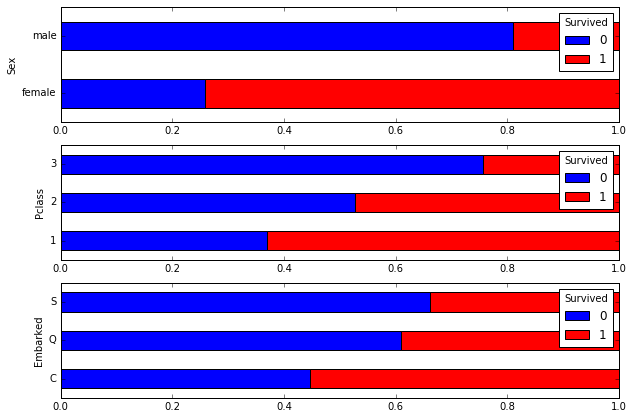

In [15]:
# Explore data

def proportionSurvived(discreteVar):
    # extract variables
    by_var=traindf.groupby([discreteVar,'Survived'])
    
    # count the survivors for each category in discreteVar
    table=by_var.size()

    # convert the counts to a DataFrame and normalize it
    table=table.unstack()
    normedtable = table.div(table.sum(1), axis=0)
    
    return normedtable

discreteVarList=['Sex','Pclass','Embarked']

fig1,axes1 = plt.subplots(3,1)
fig1.set_size_inches(10,7)
for i in range(0,3):
    var=discreteVarList[i]
    table=proportionSurvived(var)
    table.plot(kind='barh', stacked=True, ax=axes1[i],color=['blue','red'])

In [16]:
def normrgb(rgb):   # this converts rgb codes into the format matplotlib wants
    rgb = [float(x)/255 for x in rgb]
    return rgb

# define colors for male and females
darkpink, lightpink =normrgb([255,20,147]), normrgb([255,182,193])
darkblue, lightblue = normrgb([0,0,128]),normrgb([135,206, 250])

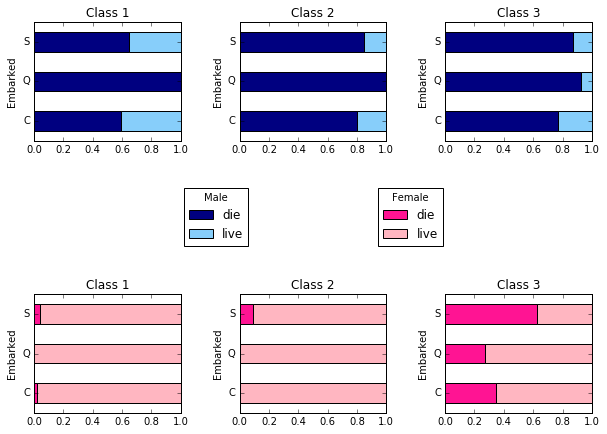

In [17]:
# Explore data by Sex and Pclass

# define unique values (i. e. genders and classes)
genders=traindf.Sex.unique()
classes=traindf.Pclass.unique()

fig2,axes2 = plt.subplots(2,3)
fig2.set_size_inches(10,7)

for gender in genders:
    for pclass in classes:
        if gender=='male':
            colorscheme=[darkblue, lightblue]
            row=0
        else:
            colorscheme=[darkpink, lightpink]
            row=1 
        group=traindf[(traindf.Sex==gender)&(traindf.Pclass==pclass)]
        group=group.groupby(['Embarked','Survived'])
        group=group.size().unstack()
        group=group.div(group.sum(1), axis=0)
        p=group.plot(kind='barh', stacked=True, ax=axes2[row, (int(pclass)-1)],color=colorscheme,legend=False)
        p.set_title('Class '+str(pclass))

# add legend 
plt.subplots_adjust(wspace=0.4, hspace=1.3)
fhandles, flabels = axes2[1,2].get_legend_handles_labels()
mhandles, mlabels = axes2[0,2].get_legend_handles_labels()

plt.figlegend(fhandles, ('die', 'live'), title='Female', loc='center', bbox_to_anchor=(0.02, 0.38, 1.1, .102))
plt.figlegend(mhandles, ('die', 'live'), title='Male', loc='center', bbox_to_anchor=(-0.25, 0.38, 1.1, .102))
    

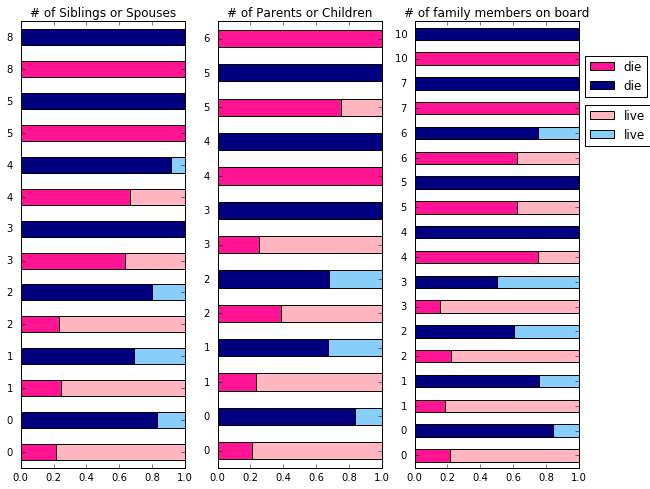

In [18]:
# Explore data by Sibsp, Parch and FamSize

traindf['FamSize']=traindf.Parch+traindf.SibSp

# define unique values (i. e. genders and classes)
genders=traindf.Sex.unique()
classes=traindf.Pclass.unique()

fig3,axes3 = plt.subplots(1,3)
fig3.set_size_inches(10,8)

family_var=['SibSp','Parch','FamSize']
title_var=['# of Siblings or Spouses','# of Parents or Children','# of family members on board']

cols = [[darkpink, darkblue],[lightpink, lightblue]]

# remove bad labels
badStringList=['(', ')', 'female', 'male', ',']

def removeBadStringFromString(string, badStringList):
    for badString in badStringList: #notice that you want female before male
        string = string.replace(badString, '')
    return string
 
def removeBadStringFromLabels(ax, badStringList):
    labels = [item.get_text() for item in ax.get_yticklabels()]
    labels = [removeBadStringFromString(label,badStringList) for label in labels]
    return labels

for i in range(0,3): 
    group=traindf.groupby([family_var[i],'Sex','Survived'])
    group=group.size().unstack()
    group=group.div(group.sum(1), axis=0)
    p=group.plot(kind='barh', stacked=True, ax=axes3[i],color=cols,legend=False)
    p.set_title(title_var[i])
    labels = removeBadStringFromLabels(axes3[i], badStringList)
    axes3[i].set_yticklabels(labels)
    axes3[i].set_ylabel('')

# add legend 
handles, labels = axes3[1].get_legend_handles_labels()

plt.figlegend(handles[0], ('die', 'die'), loc=(0.9,.8))
plt.figlegend(handles[1], ('live', 'live'), loc=(.9,.7))

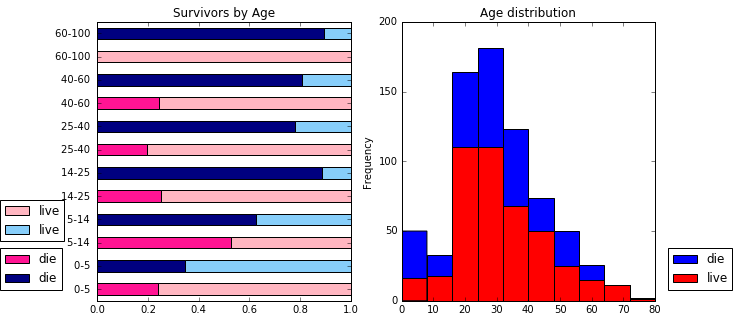

In [95]:
# Explore data by Age

fig4,axes4 = plt.subplots(1,2)
fig4.set_size_inches(10,5)

cols = [[darkpink, darkblue],[lightpink, lightblue]]

bins = [0,5,14, 25, 40, 60, 100]
binNames =['0-5', '5-14', '14-25', '25-40', '40-60', '60-100']
binAge = pd.cut(traindf.Age, bins, labels=binNames)

group=traindf.groupby([binAge,'Sex','Survived'])
group=group.size().unstack()
group=group.div(group.sum(1), axis=0)
p=group.plot(kind='barh', stacked=True,ax=axes4[0],color=cols,legend=False)
p.set_title('Survivors by Age')
labels = removeBadStringFromLabels(axes4[0], badStringList)
axes4[0].set_yticklabels(labels)
axes4[0].set_ylabel('')

traindf.Age.plot(kind='hist',range=(0,80),ax=axes4[1]).set_title('Age distribution')
traindf[traindf.Survived==0].Age.plot(kind='hist',range=(0,80),ax=axes4[1],color='red')

# add legend 
handles, labels = axes4[0].get_legend_handles_labels()

plt.figlegend(handles[0], ('die', 'die'), loc=(0,.1))
plt.figlegend(handles[1], ('live', 'live'), loc=(0,.25))

handles, labels = axes4[1].get_legend_handles_labels()

plt.figlegend(handles, ('die', 'live'), loc=(0.91,.1))

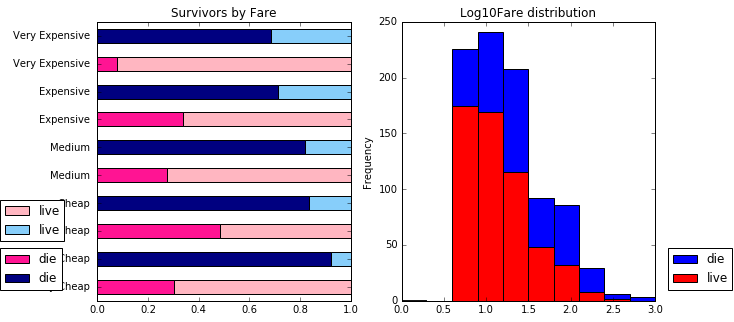

In [20]:
# Explore data by Age

fig5,axes5 = plt.subplots(1,2)
fig5.set_size_inches(10,5)

cols = [[darkpink, darkblue],[lightpink, lightblue]]

binFare,binVal = pd.qcut(traindf.Fare, 5, retbins=True,labels=['Very Cheap','Cheap','Medium','Expensive','Very Expensive'])

group=traindf.groupby([binFare,'Sex','Survived'])
group=group.size().unstack()
group=group.div(group.sum(1), axis=0)
p=group.plot(kind='barh', stacked=True,ax=axes5[0],color=cols,legend=False)
p.set_title('Survivors by Fare')
labels = removeBadStringFromLabels(axes5[0], badStringList)
axes5[0].set_yticklabels(labels)
axes5[0].set_ylabel('')

traindf.Fare.apply(lambda x:np.log10(x)).plot(kind='hist',range=(0,3),ax=axes5[1]).set_title('Log10Fare distribution')
traindf[traindf.Survived==0].Fare.apply(lambda x:np.log10(x)).plot(kind='hist',range=(0,3),ax=axes5[1],color='red')

# add legend 
handles, labels = axes5[0].get_legend_handles_labels()

plt.figlegend(handles[0], ('die', 'die'), loc=(0,.1))
plt.figlegend(handles[1], ('live', 'live'), loc=(0,.25))

handles, labels = axes5[1].get_legend_handles_labels()

plt.figlegend(handles, ('die', 'live'), loc=(0.91,.1))

CabinNew
A           15
B           47
C           59
D           33
E           32
F           13
G            4
T            1
Unknown    687
dtype: int64

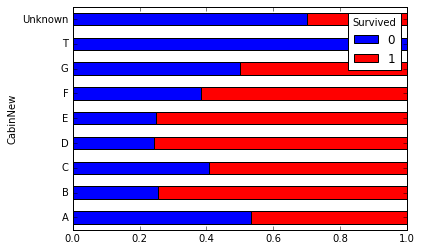

In [88]:
# Explore data by Cabin number
traindf.Cabin=traindf.Cabin.fillna('Unknown');
traindf['CabinNew']=traindf.Cabin.apply(lambda x: x[0] if x!='Unknown' else x);

table=proportionSurvived('CabinNew')
table.plot(kind='barh', stacked=True, color=['blue','red'])

traindf.groupby(['CabinNew']).size()


NumCabins
1          180
2           16
3            6
4            2
Unknown    687
dtype: int64

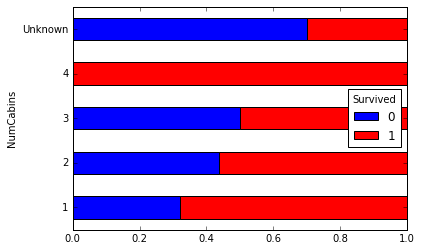

In [90]:
# Explore data by number of Cabin used
traindf['NumCabins']=traindf.Cabin.apply(lambda x: len(x.split(' ')) if x!='Unknown' else x)

table=proportionSurvived('NumCabins')
table.plot(kind='barh', stacked=True, color=['blue','red'])

traindf.groupby(['NumCabins']).size()


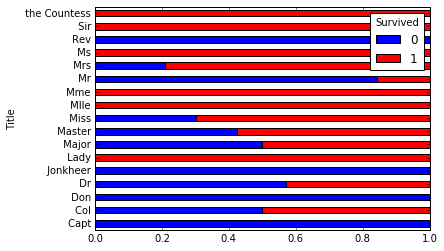

In [66]:
# Explore data by Title
traindf['Title']=traindf.Name.apply(lambda x: x.split(',')[1].split('.')[0])

table=proportionSurvived('Title')
table.plot(kind='barh', stacked=True, color=['blue','red'])